In [1]:
from scipy import integrate
import numpy as np

# Integration

In [3]:
x2 = lambda x: x**2
print(integrate.quad(x2, 0, 4))
print(4**3/3.)  #analytical result

(21.333333333333336, 2.368475785867001e-13)
21.333333333333332


In [4]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on issues during integration
    
    Integrating functions, given fixed 

In [5]:
invexp = lambda x: np.exp(-x)
print(integrate.quad(invexp, 0,np.inf))

(1.0000000000000002, 5.842606996763696e-11)


In [6]:
##[sinx] from 0 to np.pi

invsin = lambda x: np.sin(x)
print(integrate.quad(invsin, 0, np.pi))

#[-cos x] from 0 to pi
#[-cos pi + cos 0]
#[1+1]
#[2]

(2.0, 2.220446049250313e-14)


In [7]:
from matplotlib import pyplot as plt
from scipy import optimize

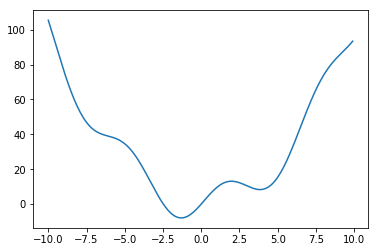

In [8]:
#--------------Finding the minimum of a scalar funcion----------
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10,10,0.1)
plt.plot(x, f(x))
plt.show()

In [9]:
#--------------BFGS algorithms-------------
print(optimize.fmin_bfgs(f, 3, disp=False))

print(optimize.fmin_bfgs(f, 0))

[ 3.83746709]
Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6
[-1.30644012]


In [10]:
#-----------basinhopping((f,0))-----------
print(optimize.basinhopping(f , 0))


                        fun: -7.945823375615284
 lowest_optimization_result:       fun: -7.945823375615284
 hess_inv: array([[ 0.08581188]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1524
                        nit: 100
                       njev: 508
                          x: array([-1.30644001])


In [11]:
#---------------roots of a scalar function--------------
root = optimize.fsolve(f,1)  #our initial guess is 1
print(root)

[ 0.]


In [12]:
root2 = optimize.fsolve(f,-2.5)  
print(root2)

[-2.47948183]


In [13]:
root3 = optimize.fsolve(f,[1,-2.5])  
print(root3)

[  2.57478115e-12  -2.47948183e+00]


In [14]:
help(optimize)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    Optimization
    
    Local Optimization
    ------------------
    
    .. autosummary::
       :toctree: generated/
    
       minimize - Unified interface for minimizers of multivariate functions
       minimize_scalar - Unified interface for minimizers of univariate functions
       OptimizeResult - The optimization result returned by some optimizers
       OptimizeWarning - The optimization encountered problems
    
    The `minimize` function supports the following methods:
    
    .. toctree::
    
       optimize.minimize-neldermead
       optimize.minimize-powell
       optimize.minimize-cg
       optimize.minimize-bfgs
       optimize.minimize-newtoncg
       optimize.minimize-lbfgsb
       optimize.minimize-tnc
       optimize.minimize-cobyla
       optimize.minimize-slsqp
       optimiz

# Linear algebra

In [15]:
from scipy import linalg

In [16]:
#---------------scipy.linalg.det()-------------
arr = np.array([[1,2],[3,4]])

print(linalg.det(arr))

-2.0


In [17]:
arr = np.array([[3,2],[6,4]])

print(linalg.det(arr))      # singular matrix det. is zero

6.661338147750939e-16


In [19]:
print(linalg.det(np.ones((3,4)))) # det. is allowed only for square matrix

ValueError: expected square matrix

In [20]:
#----------------scipy.linalg.inv()---------
arr = np.array([[1,2],[3,4]])

iarr = linalg.inv(arr)

print(iarr)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [21]:
#dot product of matrix with its inverse is identity matrix
print(np.allclose(np.dot(arr, iarr),np.eye(2)))

True


In [22]:
arr = np.array([[3,2],[6,4]])
print(linalg.inv(arr))     #throws error due to identity matrix

LinAlgError: singular matrix

In [33]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)

In [34]:
print(a)
print(bins)

[  1.61367946e+00   8.59133380e-01   1.12912191e+00   2.20428339e-01
  -1.26402010e+00   1.87401857e-01  -9.63602358e-01  -4.19554553e-01
   1.15751079e+00  -1.34140430e-01  -1.40450610e+00  -4.90042566e-01
   2.21579285e+00  -3.28023323e-01   1.54926012e+00  -9.85780769e-01
   2.83036564e-01   8.15279321e-01  -6.52608343e-01   2.19809325e-01
  -1.26485822e-01   4.86704854e-01   1.02597126e+00  -6.57018380e-01
   2.08854859e+00  -8.69693137e-01   2.23662594e+00  -4.68880494e-01
   1.45394003e+00  -4.53985310e-01  -5.73097458e-01  -5.29501391e-01
   8.36280238e-01   1.59719219e+00  -8.74286872e-01   1.24856678e+00
  -7.66231827e-01   2.12451620e-01   3.43479624e-01  -1.40700416e+00
  -1.39664170e+00   1.03440202e+00  -5.70022232e-01   2.98168260e-01
   6.55557097e-01  -6.61393417e-02  -2.02666045e-01   6.64528885e-01
  -6.37714091e-01   1.76959825e-01   1.41534637e+00  -9.70986394e-01
  -8.05723468e-02   1.02628418e+00   1.47522805e+00   8.70726217e-01
  -2.29584876e+00   6.41103226e-01

In [35]:
print(np.histogram(a, bins=bins, density=True))
histogram = np.histogram(a, bins=bins, density=True)[0]

(array([ 0.001,  0.017,  0.135,  0.344,  0.35 ,  0.129,  0.024,  0.   ]), array([-4, -3, -2, -1,  0,  1,  2,  3,  4]))


In [26]:
print(np.histogram(a, bins=bins, density=False))

(array([  2,  20, 158, 317, 352, 132,  16,   3], dtype=int64), array([-4, -3, -2, -1,  0,  1,  2,  3,  4]))


In [36]:
bins = 0.5*(bins[1:]+bins[:-1])
print(bins)

[-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]


In [37]:
from scipy import stats
b = stats.norm.pdf(bins)  # norms is a distribution

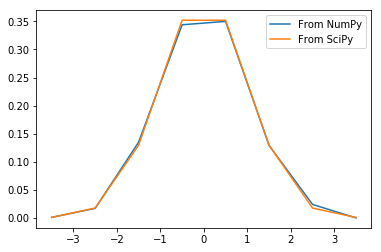

In [38]:
plt.plot(bins,histogram,label='From NumPy')
plt.plot(bins,b,label='From SciPy')
plt.legend()
plt.show()

In [39]:
#--------------Percentiles----------
print(np.median(a))

0.0103247208148


In [40]:
print(stats.scoreatpercentile(a,50))

0.0103247208148


In [41]:
print(stats.scoreatpercentile(a,90))

1.25210503644
